In [1]:
# this script plots the gene age and gene gain and loss p-values of the 4 groups compare to the all DE genes 
# mann whitney is between each grop and the DE group

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

import math
from math import log
import re
import ast
import scipy
from pandas import Series

import itertools
from collections import defaultdict

import collections

from collections import Counter
import os


In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:

stim_high_col='#88419d'
stim_other_col='#8c97c6'
stim_low_col='#c0d4e6'


unst_high_col='#2b8cbe'
unst_other_col='#7cccc4'
unst_low_col='#ccebc6'

In [5]:
# open the big metadatand leave only 1-1
human_mouse_ortho=pd.read_csv(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\input\1-1_human_mouse_metadata.csv",index_col=0)
human_mouse_ortho_1_1=human_mouse_ortho[human_mouse_ortho['Mouse homology type']=='ortholog_one2one']
human_mouse_ortho_1_1


human_mouse_ortho_1_1.columns

# create 1-1 dict mouse>human ens names 
human_mouse_ortho_1_1_dict=dict(zip(human_mouse_ortho_1_1['Mouse gene stable ID'],human_mouse_ortho_1_1.index))

In [6]:
print(len(human_mouse_ortho_1_1))

16534


In [13]:
# define the groups: 

study='Hagai'
species=['homo','mus']
if species==['homo','mus']:
    species_full_names=['Homo sapiens','Mus musculus']
treats=['LF4','PIC4']
    
    


df_groups=pd.read_csv(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\input\{}_{}_vs_{}_{}_and_{}_groups_results.csv".format(study,species[0],species[1],treats[0],treats[1]),index_col=0)
df_groups

DE_genes_FC_values_df=pd.read_csv(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\input\DE_genes_human_mouse_pic.csv",index_col=1)

DE_genes=DE_genes_FC_values_df.index
non_DE_genes=[i for i in human_mouse_ortho_1_1.index] #if i not in DE_genes#]

# stim groups - high and low
group_stim_high=df_groups[(df_groups[f'group_{treats[1]}']==f'{treats[1]}_high_strict')|(df_groups[f'group_{treats[1]}']==f'{treats[1]}_high_moderate')]
print(len(group_stim_high.index))
group_stim_high_and_DE=[i for i in group_stim_high.index if i in DE_genes_FC_values_df.index]
print(len(group_stim_high_and_DE))


group_stim_low=df_groups[(df_groups[f'group_{treats[1]}']==f'{treats[1]}_low_strict')|(df_groups[f'group_{treats[1]}']==f'{treats[1]}_low_moderate')]
print(len(group_stim_low.index))
group_stim_low_and_DE=[i for i in group_stim_low.index if i in DE_genes_FC_values_df.index]
print(len(group_stim_low_and_DE))


# unst groups - high and low
group_unst_high=df_groups[(df_groups[f'group_{treats[0]}']==f'{treats[0]}_high_strict')|(df_groups[f'group_{treats[0]}']==f'{treats[0]}_high_moderate')]
print(len(group_unst_high.index))
group_unst_high_and_DE=[i for i in group_unst_high.index if i in DE_genes_FC_values_df.index]
print(len(group_unst_high_and_DE))


group_unst_low=df_groups[(df_groups[f'group_{treats[0]}']==f'{treats[0]}_low_strict')|(df_groups[f'group_{treats[0]}']==f'{treats[0]}_low_moderate')]
print(len(group_unst_low.index))
group_unst_low_and_DE=[i for i in group_unst_low.index if i in DE_genes_FC_values_df.index]
print(len(group_unst_low_and_DE))


579
224
519
166
498
104
476
84


In [8]:
print(len(DE_genes))

1473


HUMAN_PPODv4_Jaccard_dollo_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        6.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       3.0       4.0      4.0
2                  7.0            7.0        3.0       6.0       6.0      3.0
3                  7.0            7.0        3.0       4.0       6.0      6.0
4                  NaN            NaN        4.0       3.0       6.0      6.0
...                ...            ...        ...       ...       ...      ...
16529              4.0            NaN        NaN       NaN       NaN      NaN
16530              4.0            NaN        NaN       NaN       NaN      NaN
16531              3.0            NaN        NaN       NaN       NaN      NaN
16532              6.0            NaN        NaN       NaN       NaN      NaN
16533              4.0            NaN        NaN       NaN       NaN      NaN

[16534 rows x 6 columns]
 

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


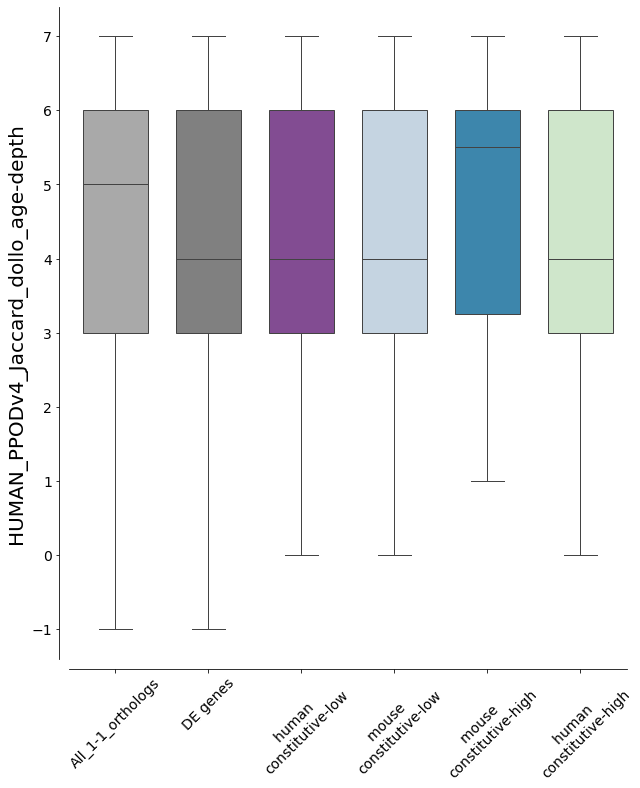

mann DE_PIC_high
MannwhitneyuResult(statistic=148385.0, pvalue=0.8025216802850361)
mann DE_PIC_low
MannwhitneyuResult(statistic=118432.5, pvalue=0.01969419785576093)
mann DE_LF_high
MannwhitneyuResult(statistic=65494.0, pvalue=0.940738087996403)
mann DE_LF_low
MannwhitneyuResult(statistic=57562.5, pvalue=0.37397482317763)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.8025216802850361, 0.01969419785576093, 0.940738087996403, 0.37397482317763]
[0.94073809 0.07877679 0.94073809 0.74794965]
HUMAN_PPODv4_Jaccard_wagner1.0_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        6.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       3.0       3.0      3.0
2                  7.0            7.0        1.0       6.0       6.0      3.0
3                  7.0            7.0        3.0       3.0       6.0      5.0
4                  NaN            NaN        3.0       3.0       

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


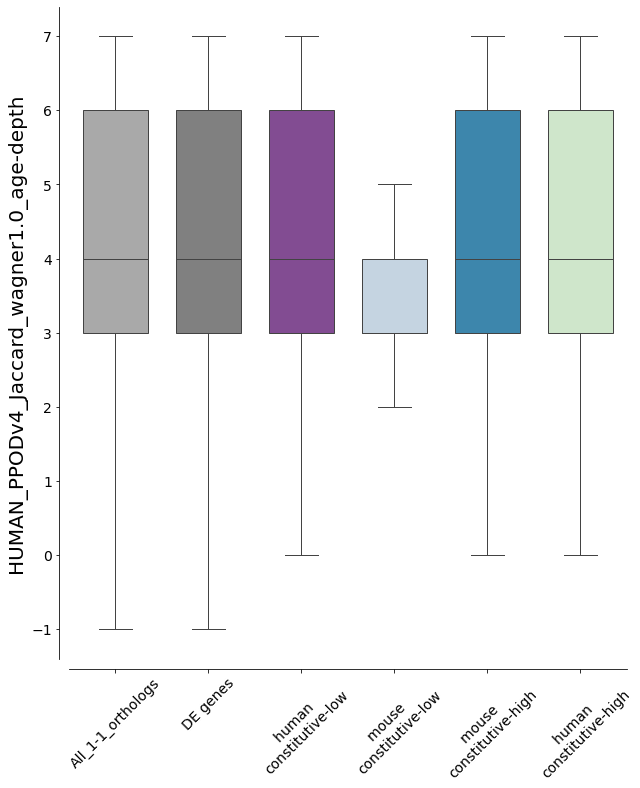

mann DE_PIC_high
MannwhitneyuResult(statistic=149964.0, pvalue=0.7227328694004449)
mann DE_PIC_low
MannwhitneyuResult(statistic=119958.5, pvalue=0.009762421630965488)
mann DE_LF_high
MannwhitneyuResult(statistic=66096.0, pvalue=0.9190706045826098)
mann DE_LF_low
MannwhitneyuResult(statistic=56566.0, pvalue=0.48193655494982246)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.7227328694004449, 0.009762421630965488, 0.9190706045826098, 0.48193655494982246]
[0.9190706  0.03904969 0.9190706  0.9190706 ]
HUMAN_PPODv4_MultiParanoid_dollo_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        2.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       4.0       4.0      4.0
2                  7.0            7.0        1.0       6.0       3.0      2.0
3                  7.0            7.0        4.0       4.0       6.0      6.0
4                  NaN            NaN        4.0     

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


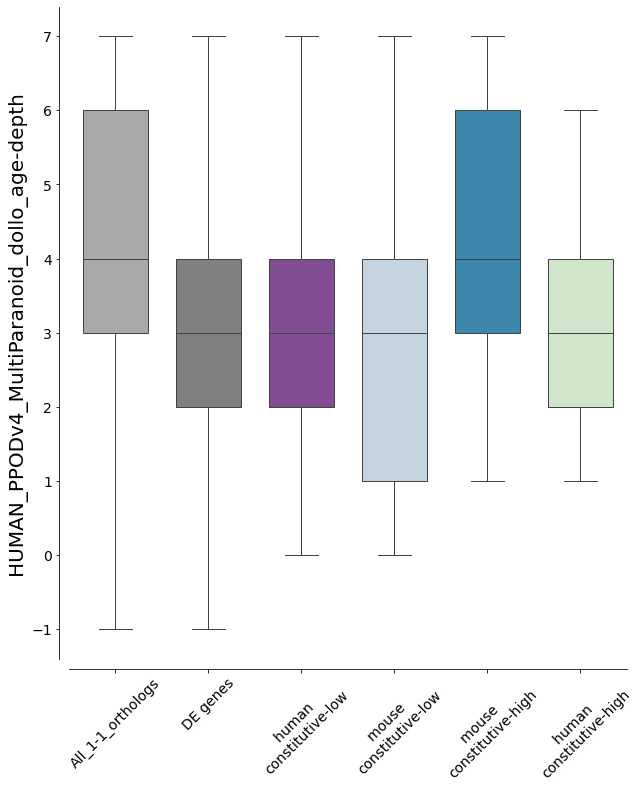

mann DE_PIC_high
MannwhitneyuResult(statistic=156266.0, pvalue=0.3419948425686701)
mann DE_PIC_low
MannwhitneyuResult(statistic=118281.0, pvalue=0.022482320685328287)
mann DE_LF_high
MannwhitneyuResult(statistic=61309.0, pvalue=0.9944801835705959)
mann DE_LF_low
MannwhitneyuResult(statistic=58612.0, pvalue=0.27319519875924997)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.3419948425686701, 0.022482320685328287, 0.9944801835705959, 0.27319519875924997]
[0.45599312 0.08992928 0.99448018 0.45599312]
HUMAN_PPODv4_MultiParanoid_wagner1.0_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        2.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       4.0       3.0      3.0
2                  7.0            7.0        1.0       6.0       3.0      2.0
3                  5.0            5.0        3.0       3.0       6.0      5.0
4                  NaN            NaN        3.0 

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


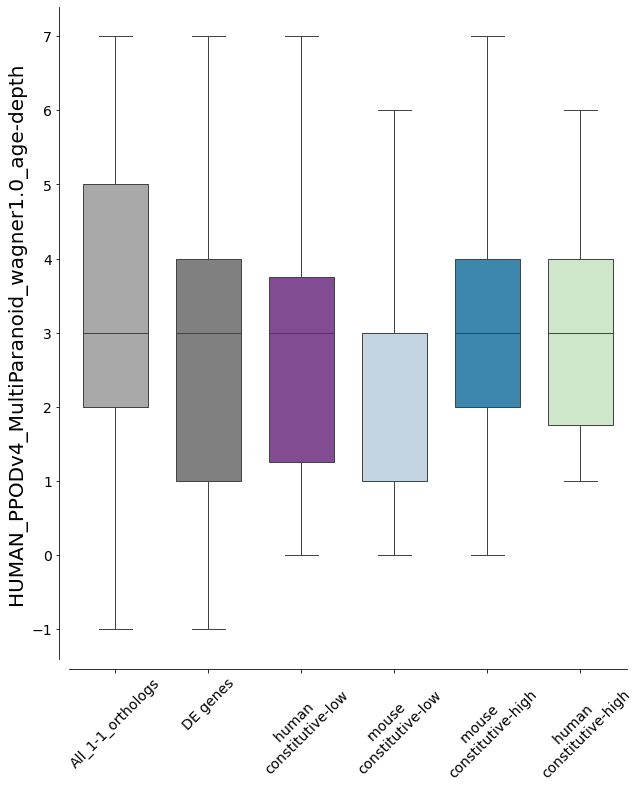

mann DE_PIC_high
MannwhitneyuResult(statistic=153187.0, pvalue=0.5318729384986732)
mann DE_PIC_low
MannwhitneyuResult(statistic=118718.5, pvalue=0.01787229535256713)
mann DE_LF_high
MannwhitneyuResult(statistic=63465.0, pvalue=0.9790607638563504)
mann DE_LF_low
MannwhitneyuResult(statistic=56832.0, pvalue=0.4529364678743825)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.5318729384986732, 0.01787229535256713, 0.9790607638563504, 0.4529364678743825]
[0.70916392 0.07148918 0.97906076 0.70916392]
HUMAN_PPODv4_Nens_dollo_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        2.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       4.0       4.0      4.0
2                  7.0            7.0        1.0       7.0       3.0      2.0
3                  7.0            7.0        4.0       4.0       6.0      6.0
4                  NaN            NaN        4.0       6.0       5

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


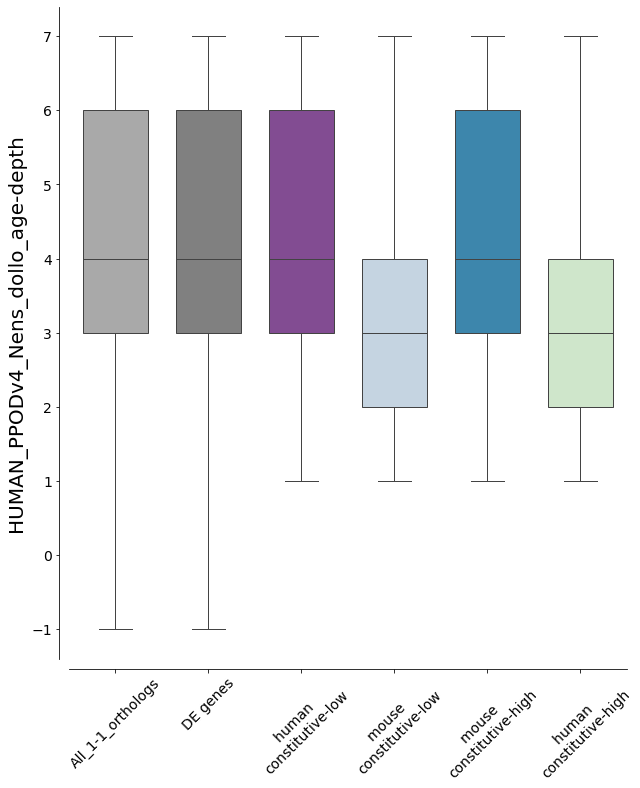

mann DE_PIC_high
MannwhitneyuResult(statistic=150894.0, pvalue=0.6707184236551404)
mann DE_PIC_low
MannwhitneyuResult(statistic=122352.0, pvalue=0.0026469813941484748)
mann DE_LF_high
MannwhitneyuResult(statistic=59577.5, pvalue=0.9984565311458122)
mann DE_LF_low
MannwhitneyuResult(statistic=62061.0, pvalue=0.06130561671895696)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.6707184236551404, 0.0026469813941484748, 0.9984565311458122, 0.06130561671895696]
[0.89429123 0.01058793 0.99845653 0.12261123]
HUMAN_PPODv4_Nens_wagner1.0_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        2.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       4.0       3.0      3.0
2                  7.0            7.0        1.0       7.0       3.0      2.0
3                  5.0            5.0        3.0       3.0       6.0      5.0
4                  NaN            NaN        3.0       6

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


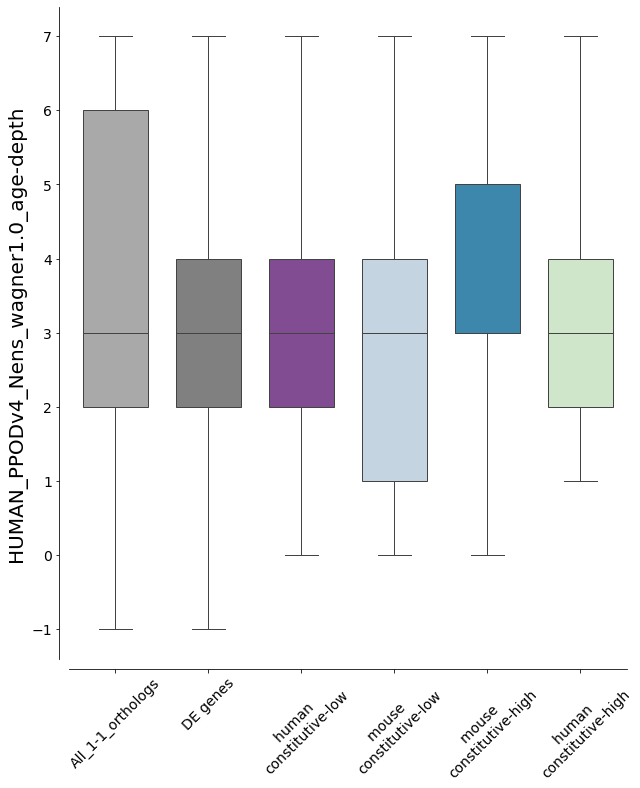

mann DE_PIC_high
MannwhitneyuResult(statistic=151525.5, pvalue=0.6342880766276536)
mann DE_PIC_low
MannwhitneyuResult(statistic=120364.5, pvalue=0.007904361686843265)
mann DE_LF_high
MannwhitneyuResult(statistic=63973.5, pvalue=0.9718329231384798)
mann DE_LF_low
MannwhitneyuResult(statistic=59474.5, pvalue=0.20027134912333827)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.6342880766276536, 0.007904361686843265, 0.9718329231384798, 0.20027134912333827]
[0.84571744 0.03161745 0.97183292 0.4005427 ]
HUMAN_PPODv4_OrthoMCL_dollo_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        2.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       3.0       4.0      4.0
2                  7.0            7.0        1.0       2.0       3.0      2.0
3                  7.0            7.0        4.0       3.0       6.0      6.0
4                  NaN            NaN        2.0       3.0

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


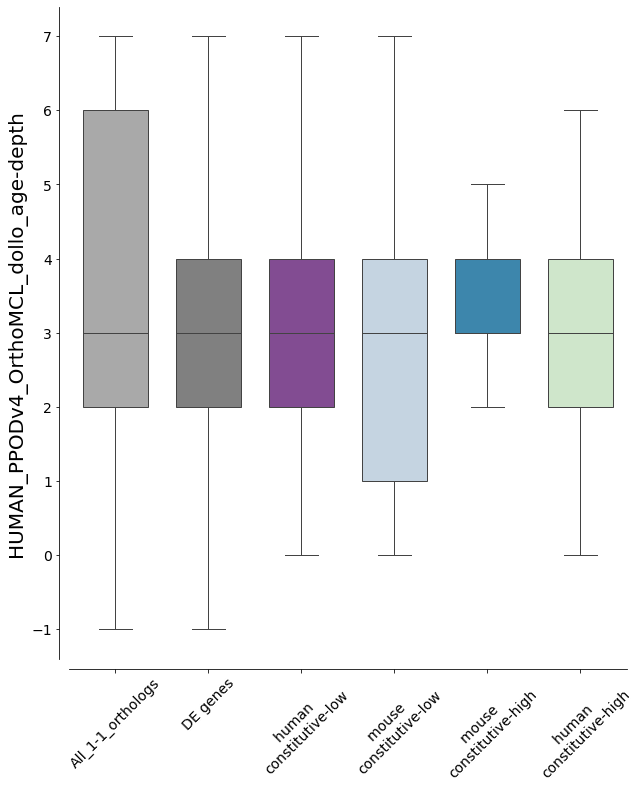

mann DE_PIC_high
MannwhitneyuResult(statistic=151263.5, pvalue=0.6500540956345466)
mann DE_PIC_low
MannwhitneyuResult(statistic=119530.5, pvalue=0.011971018436591381)
mann DE_LF_high
MannwhitneyuResult(statistic=61961.5, pvalue=0.9917800611199243)
mann DE_LF_low
MannwhitneyuResult(statistic=60391.5, pvalue=0.1368528782229973)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.6500540956345466, 0.011971018436591381, 0.9917800611199243, 0.1368528782229973]
[0.86673879 0.04788407 0.99178006 0.27370576]
HUMAN_PPODv4_OrthoMCL_wagner1.0_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        2.0       1.0       3.0      3.0
1                  7.0            7.0        6.0       3.0       3.0      3.0
2                  7.0            7.0        1.0       2.0       3.0      2.0
3                  5.0            5.0        3.0       3.0       6.0      5.0
4                  NaN            NaN        2.0       3

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


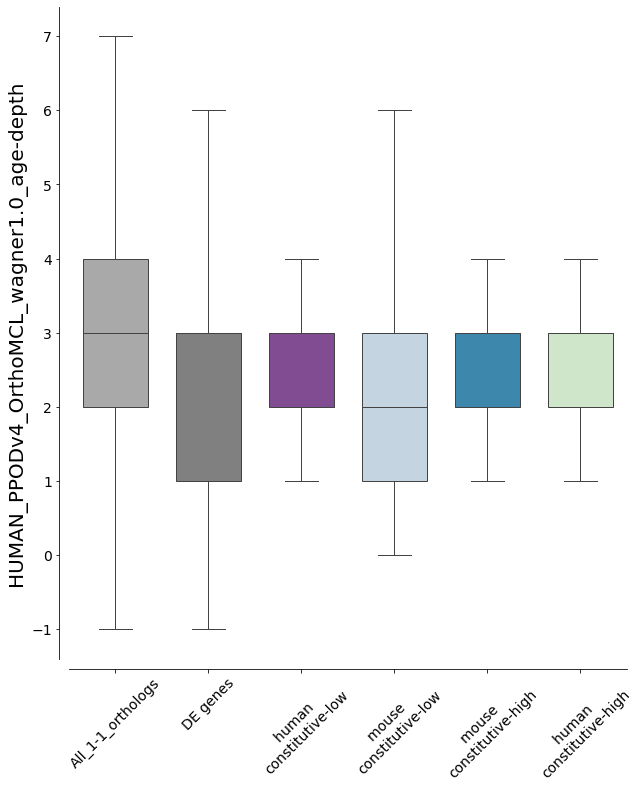

mann DE_PIC_high
MannwhitneyuResult(statistic=151921.0, pvalue=0.6116094476304166)
mann DE_PIC_low
MannwhitneyuResult(statistic=122885.5, pvalue=0.0017126977067796773)
mann DE_LF_high
MannwhitneyuResult(statistic=65492.0, pvalue=0.9404964745486094)
mann DE_LF_low
MannwhitneyuResult(statistic=56033.5, pvalue=0.5403535642748445)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.6116094476304166, 0.0017126977067796773, 0.9404964745486094, 0.5403535642748445]
[0.81547926 0.00685079 0.94049647 0.81547926]
HUMAN_PPODv4_PTHR7-OrthoMCL_dollo_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                 15.0           15.0       11.0       8.0       9.0     15.0
1                 15.0           15.0       14.0       9.0      15.0     14.0
2                 15.0           15.0       12.0       8.0       9.0      8.0
3                 15.0           15.0       14.0      12.0      14.0     15.0
4                  NaN            NaN       11.0    

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


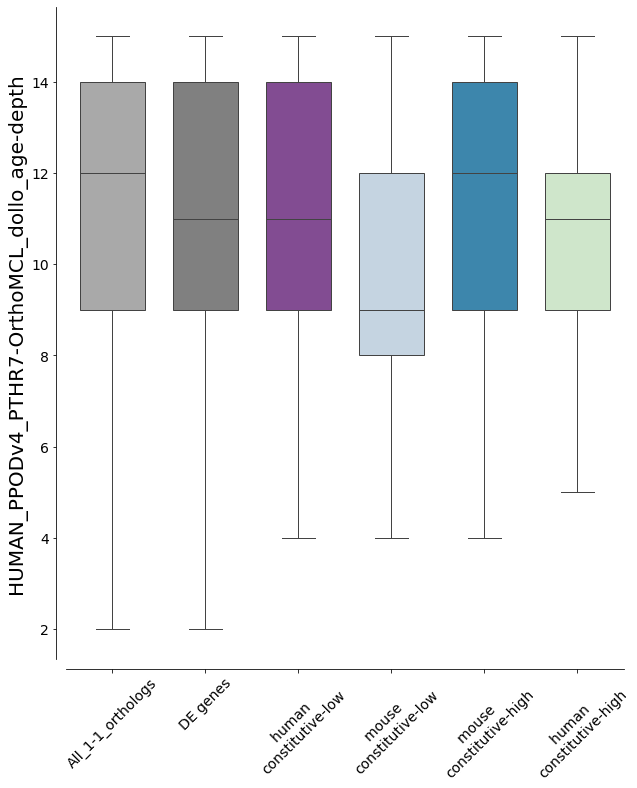

mann DE_PIC_high
MannwhitneyuResult(statistic=156369.0, pvalue=0.3368323403684451)
mann DE_PIC_low
MannwhitneyuResult(statistic=124565.5, pvalue=0.0006944589150386752)
mann DE_LF_high
MannwhitneyuResult(statistic=59409.0, pvalue=0.998570885482197)
mann DE_LF_low
MannwhitneyuResult(statistic=57616.0, pvalue=0.3708715848721162)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.3368323403684451, 0.0006944589150386752, 0.998570885482197, 0.3708715848721162]
[0.49449545 0.00277784 0.99857089 0.49449545]
HUMAN_PPODv4_PTHR7-OrthoMCL_wagner1.0_age-depth
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                  7.0            7.0        8.0       6.0       9.0      9.0
1                  7.0            7.0       14.0       9.0      12.0      4.0
2                 15.0           15.0        5.0       8.0       9.0      0.0
3                 15.0           15.0        9.0      11.0      10.0     14.0
4                  NaN            NaN       11.0  

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1277140850.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


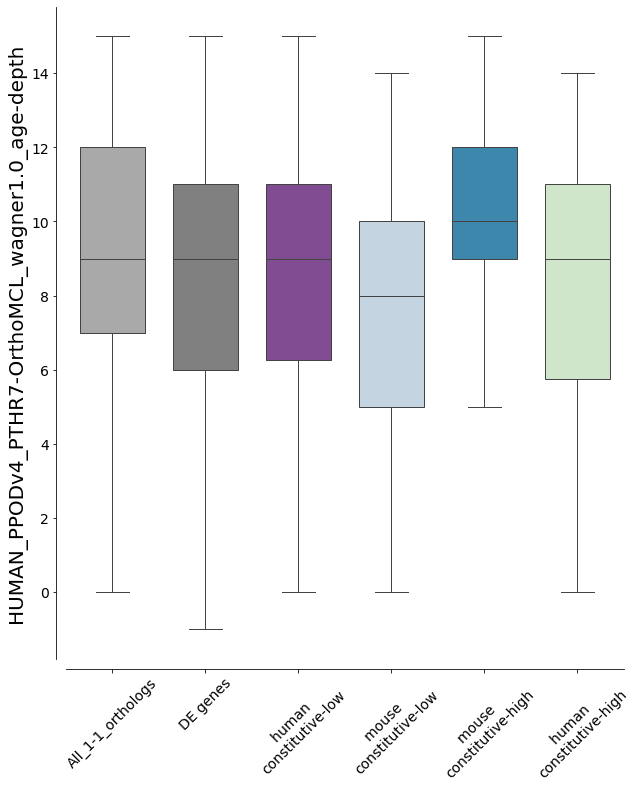

mann DE_PIC_high
MannwhitneyuResult(statistic=155199.5, pvalue=0.40701358166632295)
mann DE_PIC_low
MannwhitneyuResult(statistic=126474.0, pvalue=0.00020597200732474466)
mann DE_LF_high
MannwhitneyuResult(statistic=58829.0, pvalue=0.9990119480077019)
mann DE_LF_low
MannwhitneyuResult(statistic=56650.0, pvalue=0.4732492480415767)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.40701358166632295, 0.00020597200732474466, 0.9990119480077019, 0.4732492480415767]
[6.30998997e-01 8.23888029e-04 9.99011948e-01 6.30998997e-01]


In [21]:
for ga in ['HUMAN_PPODv4_Jaccard_dollo_age-depth',
       'HUMAN_PPODv4_Jaccard_wagner1.0_age-depth',
       'HUMAN_PPODv4_MultiParanoid_dollo_age-depth',
       'HUMAN_PPODv4_MultiParanoid_wagner1.0_age-depth',
       'HUMAN_PPODv4_Nens_dollo_age-depth',
       'HUMAN_PPODv4_Nens_wagner1.0_age-depth',
       'HUMAN_PPODv4_OrthoMCL_dollo_age-depth',
       'HUMAN_PPODv4_OrthoMCL_wagner1.0_age-depth',
       'HUMAN_PPODv4_PTHR7-OrthoMCL_dollo_age-depth',
       'HUMAN_PPODv4_PTHR7-OrthoMCL_wagner1.0_age-depth']:
    
    print(ga)
    data_to_plot=pd.DataFrame()
    data_to_plot['rest_1_1_orthos']=list(human_mouse_ortho_1_1.loc[[i for i in non_DE_genes if i in human_mouse_ortho_1_1.index]][ga])

    data_to_plot['rest_DE_genes']=list(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[1]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[1]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[0]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[0]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    print(data_to_plot)
    data_to_plot_new=data_to_plot[['rest_1_1_orthos','rest_DE_genes',f'{treats[1]}_high',f'{treats[1]}_low',f'{treats[0]}_high',f'{treats[0]}_low']]

    data_to_plot_new

    data_to_plot_new.rename(columns={'rest_1_1_orthos':'All_1-1_orthologs','rest_DE_genes':'rest of DE genes','PIC4_high':'STIM-high','PIC4_low':'STIM-low','LF4_high':'UNST-high','LF4_low':'UNST-low' },inplace=True)
    data_to_plot_new
    
    print(data_to_plot_new)
    
    
    print('rest of DE genes')
    print(len(data_to_plot_new['rest of DE genes'].dropna()))
    print('STIM-high')
    print(len(data_to_plot_new['STIM-high'].dropna()))
    print('STIM-low')
    print(len(data_to_plot_new['STIM-low'].dropna()))
    print('UNST-high')
    print(len(data_to_plot_new['UNST-high'].dropna()))
    print('UNST-low')
    print(len(data_to_plot_new['UNST-low'].dropna()))

    
    data=data_to_plot_new.copy()
    fig=plt.figure(figsize=(10,12))

    my_pal = {'All_1-1_orthologs':"darkgrey", 
        "rest of DE genes": "grey",
                  "STIM-high": stim_high_col, "STIM-low": stim_low_col,
              "UNST-high": unst_high_col, "UNST-low": unst_low_col
                 }

    pvals_for_FDR=[]


    ax=sns.boxplot(data=data,order=['All_1-1_orthologs','rest of DE genes','STIM-high','STIM-low','UNST-high','UNST-low'],palette=my_pal,width=0.7,showfliers = False)
    # old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')
    sns.despine(offset=10, trim=False,fig=fig)
    ax.set_xticklabels(labels=['All_1-1_orthologs','DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])

    
    plt.tick_params(axis='x', which='both', labelsize=14,labelrotation=45)
    plt.ylabel(ga,fontsize=20)
    plt.tick_params(axis='y',labelsize =14)

    if ga!='HUMAN_PPODv4_PTHR7-OrthoMCL_wagner1.0_age-depth':
        pass
#         plt.savefig(r'figures\non_relevant_geneage\gene_age_{}.pdf'.format(ga))
#         plt.savefig(r'figures\non_relevant_geneage\gene_age_{}.png'.format(ga))
    else:
        plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\gene_age_{}.pdf".format(ga))
        plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\gene_age_{}.png".format(ga))
        

    plt.show()


    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-high'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_high']['p_identity'])
    print('mann DE_PIC_high')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])


    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-low'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_low']['p_identity'])
    print('mann DE_PIC_low')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])



    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-high'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_high']['p_identity'])
    print('mann DE_LF_high')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])



    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-low'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
    print('mann DE_LF_low')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])


   # for jjj in (data['rest_1_1_orthos'].dropna()):
   #     if type(jjj)==str:
        #if (str(jjj)[0]!='0') & (str(jjj)[0]!='1') & (str(jjj)[0]!='2') & (str(jjj)[0]!='3') & (str(jjj)[0]!='4') & (str(jjj)[0]!='5') & (str(jjj)[0]!='6') & (str(jjj)[0]!='7') & (str(jjj)[0]!='8') & (str(jjj)[0]!='9'):
   #         print(jjj)
            
    for jjj in (data['rest of DE genes'].dropna()):
        if type(jjj)==str:
        #if (str(jjj)[0]!='0') & (str(jjj)[0]!='1') & (str(jjj)[0]!='2') & (str(jjj)[0]!='3') & (str(jjj)[0]!='4') & (str(jjj)[0]!='5') & (str(jjj)[0]!='6') & (str(jjj)[0]!='7') & (str(jjj)[0]!='8') & (str(jjj)[0]!='9'):
            print(jjj)
    
 #    mann_w=scipy.stats.mannwhitneyu(x=data['rest_1_1_orthos'].dropna(), y=data['rest of DE genes'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
 #   print('mann DE_nonDE(all)')
 #   print(mann_w)
    
    
    print('FDR')
    print('[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]')
    print(len(pvals_for_FDR))
    print(pvals_for_FDR)
    from statsmodels.stats.multitest import fdrcorrection
    rejected, qvalue = fdrcorrection(pvals_for_FDR,method='indep')
    print(qvalue)





In [11]:
# only for the relevant 

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\1729614696.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot_new.rename(columns={'rest_DE_genes':'rest of DE genes','PIC4_high':'STIM-high','PIC4_low':'STIM-low','LF4_high':'UNST-high','LF4_low':'UNST-low' },inplace=True)


rest of DE genes
1410
STIM-high
218
218
STIM-low
153
153
UNST-high
102
102
UNST-low
80
80


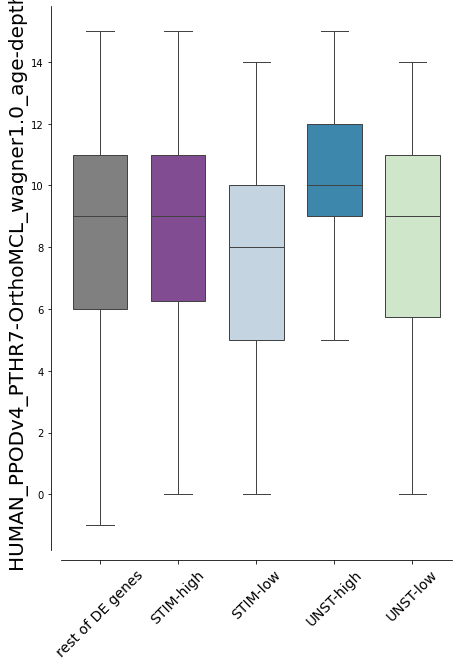

mann DE_PIC_high
MannwhitneyuResult(statistic=155199.5, pvalue=0.40701358166632295)
mann DE_PIC_low
MannwhitneyuResult(statistic=126474.0, pvalue=0.00020597200732474466)
mann DE_LF_high
MannwhitneyuResult(statistic=58829.0, pvalue=0.9990119480077019)
mann DE_LF_low
MannwhitneyuResult(statistic=56650.0, pvalue=0.4732492480415767)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.40701358166632295, 0.00020597200732474466, 0.9990119480077019, 0.4732492480415767]
[6.30998997e-01 8.23888029e-04 9.99011948e-01 6.30998997e-01]


In [11]:
for ga in [
       'HUMAN_PPODv4_PTHR7-OrthoMCL_wagner1.0_age-depth']:
    data_to_plot=pd.DataFrame()
    data_to_plot['rest_1_1_orthos']=list(human_mouse_ortho_1_1.loc[[i for i in non_DE_genes if i in human_mouse_ortho_1_1.index]][ga])

    data_to_plot['rest_DE_genes']=list(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[1]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[1]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[0]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[0]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot_new=data_to_plot[['rest_DE_genes',f'{treats[1]}_high',f'{treats[1]}_low',f'{treats[0]}_high',f'{treats[0]}_low']]

    data_to_plot_new

    data_to_plot_new.rename(columns={'rest_DE_genes':'rest of DE genes','PIC4_high':'STIM-high','PIC4_low':'STIM-low','LF4_high':'UNST-high','LF4_low':'UNST-low' },inplace=True)
    data_to_plot_new
    
    
    print('rest of DE genes')
    print(len(data_to_plot_new['rest of DE genes'].dropna()))
    rest_of_DE_genes_list=list(data_to_plot_new['rest of DE genes'].dropna())
    print('STIM-high')
    print(len(data_to_plot_new['STIM-high'].dropna()))
    STIM_high_list=list(data_to_plot_new['STIM-high'].dropna())
    print(len(STIM_high_list))
    print('STIM-low')
    print(len(data_to_plot_new['STIM-low'].dropna()))
    STIM_low_list=list(data_to_plot_new['STIM-low'].dropna())
    print(len(STIM_low_list))
    print('UNST-high')
    UNST_high_list=list(data_to_plot_new['UNST-high'].dropna())
    print(len(UNST_high_list))
    print(len(data_to_plot_new['UNST-high'].dropna()))
    print('UNST-low')
    print(len(data_to_plot_new['UNST-low'].dropna()))
    UNST_low_list=list(data_to_plot_new['UNST-low'].dropna())
    print(len(UNST_low_list))


    
    data=data_to_plot_new.copy()
    fig=plt.figure(figsize=(7,10))

    my_pal = { "rest of DE genes": "grey",
                  "STIM-high": stim_high_col, "STIM-low": stim_low_col,
              "UNST-high": unst_high_col, "UNST-low": unst_low_col
                 }

    pvals_for_FDR=[]


    sns.boxplot(data=data,order=['rest of DE genes','STIM-high','STIM-low','UNST-high','UNST-low'],palette=my_pal,width=0.7,showfliers = False)
    # old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')
    sns.despine(offset=10, trim=False,fig=fig)

    plt.tick_params(axis='x', which='both', labelsize=14,labelrotation=45)
    plt.ylabel(ga,fontsize=20)
    plt.show()


    mann_w=scipy.stats.mannwhitneyu(x=rest_of_DE_genes_list, y=STIM_high_list,alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_high']['p_identity'])
    print('mann DE_PIC_high')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])


    mann_w=scipy.stats.mannwhitneyu(x=rest_of_DE_genes_list, y=STIM_low_list,alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_low']['p_identity'])
    print('mann DE_PIC_low')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])



    mann_w=scipy.stats.mannwhitneyu(x=rest_of_DE_genes_list, y=UNST_high_list,alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_high']['p_identity'])
    print('mann DE_LF_high')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])



    mann_w=scipy.stats.mannwhitneyu(x=rest_of_DE_genes_list, y=UNST_low_list,alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
    print('mann DE_LF_low')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])


   # for jjj in (data['rest_1_1_orthos'].dropna()):
   #     if type(jjj)==str:
        #if (str(jjj)[0]!='0') & (str(jjj)[0]!='1') & (str(jjj)[0]!='2') & (str(jjj)[0]!='3') & (str(jjj)[0]!='4') & (str(jjj)[0]!='5') & (str(jjj)[0]!='6') & (str(jjj)[0]!='7') & (str(jjj)[0]!='8') & (str(jjj)[0]!='9'):
   #         print(jjj)
            
    for jjj in (data['rest of DE genes'].dropna()):
        if type(jjj)==str:
        #if (str(jjj)[0]!='0') & (str(jjj)[0]!='1') & (str(jjj)[0]!='2') & (str(jjj)[0]!='3') & (str(jjj)[0]!='4') & (str(jjj)[0]!='5') & (str(jjj)[0]!='6') & (str(jjj)[0]!='7') & (str(jjj)[0]!='8') & (str(jjj)[0]!='9'):
            print(jjj)
    
 #    mann_w=scipy.stats.mannwhitneyu(x=data['rest_1_1_orthos'].dropna(), y=data['rest of DE genes'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
 #   print('mann DE_nonDE(all)')
 #   print(mann_w)
    
    
    print('FDR')
    print('[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]')
    print(len(pvals_for_FDR))
    print(pvals_for_FDR)
    from statsmodels.stats.multitest import fdrcorrection
    rejected, qvalue = fdrcorrection(pvals_for_FDR,method='indep')
    print(qvalue)





In [9]:
# for gene gain & loss

p-value_gain_and_loss
       rest_1_1_orthos  rest_DE_genes  PIC4_high  PIC4_low  LF4_high  LF4_low
0                0.000            0.0      1.000     0.992     0.865    0.987
1                0.000            0.0      0.632     1.000     0.987    0.968
2                0.000            0.0      0.396     0.999     0.025    0.972
3                0.000            0.0      0.987     1.000     0.929    0.891
4                0.000            0.0      1.000     0.996     0.995    0.013
...                ...            ...        ...       ...       ...      ...
16529            0.796            NaN        NaN       NaN       NaN      NaN
16530            0.010            NaN        NaN       NaN       NaN      NaN
16531            0.997            NaN        NaN       NaN       NaN      NaN
16532            0.989            NaN        NaN       NaN       NaN      NaN
16533            0.846            NaN        NaN       NaN       NaN      NaN

[16534 rows x 6 columns]
       All_1-1_o

C:\Users\TzachiHNB6\AppData\Local\Temp\ipykernel_25044\520934583.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["All_1-1_orthologs",'DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


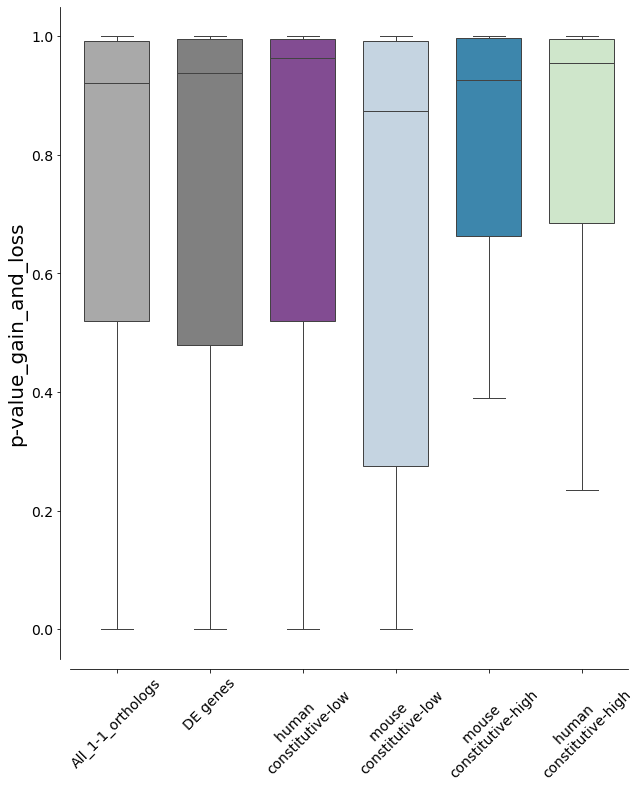

mann DE_PIC_high
MannwhitneyuResult(statistic=155383.0, pvalue=0.9202039422356212)
mann DE_PIC_low
MannwhitneyuResult(statistic=132434.5, pvalue=0.03894650209490844)
mann DE_LF_high
MannwhitneyuResult(statistic=74043.5, pvalue=0.7155590525782537)
mann DE_LF_low
MannwhitneyuResult(statistic=59835.0, pvalue=0.694150214924585)
FDR
[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]
4
[0.9202039422356212, 0.03894650209490844, 0.7155590525782537, 0.694150214924585]
[0.92020394 0.15578601 0.92020394 0.92020394]


In [26]:
for ga in ['p-value_gain_and_loss']:
    print(ga)
    data_to_plot=pd.DataFrame()
    data_to_plot['rest_1_1_orthos']=list(human_mouse_ortho_1_1.loc[[i for i in non_DE_genes if i in human_mouse_ortho_1_1.index]][ga])

    data_to_plot['rest_DE_genes']=list(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in DE_genes if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[1]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_high_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[1]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_stim_low_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[0]}_high']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_high_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    data_to_plot[f'{treats[0]}_low']=list(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]][ga])+[np.nan]*(len(data_to_plot.index)-len(human_mouse_ortho_1_1.loc[[i for i in group_unst_low_and_DE if i in human_mouse_ortho_1_1.index]][ga].index))

    print(data_to_plot)
    data_to_plot_new=data_to_plot[['rest_1_1_orthos','rest_DE_genes',f'{treats[1]}_high',f'{treats[1]}_low',f'{treats[0]}_high',f'{treats[0]}_low']]

    data_to_plot_new

    data_to_plot_new.rename(columns={'rest_1_1_orthos':"All_1-1_orthologs",'rest_DE_genes':'rest of DE genes','PIC4_high':'STIM-high','PIC4_low':'STIM-low','LF4_high':'UNST-high','LF4_low':'UNST-low' },inplace=True)
    data_to_plot_new
    
    print(data_to_plot_new)
    
    
    print('rest of DE genes')
    print(len(data_to_plot_new['rest of DE genes'].dropna()))
    print('STIM-high')
    print(len(data_to_plot_new['STIM-high'].dropna()))
    print('STIM-low')
    print(len(data_to_plot_new['STIM-low'].dropna()))
    print('UNST-high')
    print(len(data_to_plot_new['UNST-high'].dropna()))
    print('UNST-low')
    print(len(data_to_plot_new['UNST-low'].dropna()))

    
    data=data_to_plot_new.copy()
    fig=plt.figure(figsize=(10,12))

    my_pal = { "All_1-1_orthologs":"darkgrey",
                "rest of DE genes": "grey",
                  "STIM-high": stim_high_col, "STIM-low": stim_low_col,
              "UNST-high": unst_high_col, "UNST-low": unst_low_col
                 }

    pvals_for_FDR=[]


    ax=sns.boxplot(data=data,order=['All_1-1_orthologs','rest of DE genes','STIM-high','STIM-low','UNST-high','UNST-low'],palette=my_pal,width=0.7,showfliers = False)
    # old: sns.boxplot(data=human_mouse_ortho_1_1,x='group',y='p_identity',order=['rest_1_1_orthos','rest_DE_genes','PIC4_high','PIC4_low','LF4_high','LF4_low'],palette='pastel')
    sns.despine(offset=10, trim=False,fig=fig)
    ax.set_xticklabels(labels=["All_1-1_orthologs",'DE genes','human \nconstitutive-low','mouse \nconstitutive-low','mouse \nconstitutive-high','human \nconstitutive-high' ])


    plt.tick_params(axis='x', which='both', labelsize=14,labelrotation=45)
    plt.ylabel(ga,fontsize=20)
    plt.tick_params(axis='y',labelsize =14)

    
    plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\gain_and_loss.pdf")
    plt.savefig(r"C:\Users\TzachiHNB6\Documents\lilach's paper\fig6\figures\gain_and_loss.png")

    plt.show()


    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-high'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_high']['p_identity'])
    print('mann DE_PIC_high')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])


    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['STIM-low'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='PIC4_low']['p_identity'])
    print('mann DE_PIC_low')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])



    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-high'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_high']['p_identity'])
    print('mann DE_LF_high')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])



    mann_w=scipy.stats.mannwhitneyu(x=data['rest of DE genes'].dropna(), y=data['UNST-low'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
    print('mann DE_LF_low')
    print(mann_w)
    pvals_for_FDR.append(mann_w[1])


   # for jjj in (data['rest_1_1_orthos'].dropna()):
   #     if type(jjj)==str:
        #if (str(jjj)[0]!='0') & (str(jjj)[0]!='1') & (str(jjj)[0]!='2') & (str(jjj)[0]!='3') & (str(jjj)[0]!='4') & (str(jjj)[0]!='5') & (str(jjj)[0]!='6') & (str(jjj)[0]!='7') & (str(jjj)[0]!='8') & (str(jjj)[0]!='9'):
   #         print(jjj)
            
    for jjj in (data['rest of DE genes'].dropna()):
        if type(jjj)==str:
        #if (str(jjj)[0]!='0') & (str(jjj)[0]!='1') & (str(jjj)[0]!='2') & (str(jjj)[0]!='3') & (str(jjj)[0]!='4') & (str(jjj)[0]!='5') & (str(jjj)[0]!='6') & (str(jjj)[0]!='7') & (str(jjj)[0]!='8') & (str(jjj)[0]!='9'):
            print(jjj)
    
 #    mann_w=scipy.stats.mannwhitneyu(x=data['rest_1_1_orthos'].dropna(), y=data['rest of DE genes'].dropna(),alternative='greater')
    #mann_w=scipy.stats.mannwhitneyu(x=data[data['group']=='rest_DE_genes']['p_identity'], y=data[data['group']=='LF4_low']['p_identity'])
 #   print('mann DE_nonDE(all)')
 #   print(mann_w)
    
    
    print('FDR')
    print('[DE_PIC_high, DE_PIC_low, DE_LF_high, DE_LF_low]')
    print(len(pvals_for_FDR))
    print(pvals_for_FDR)
    from statsmodels.stats.multitest import fdrcorrection
    rejected, qvalue = fdrcorrection(pvals_for_FDR,method='indep')
    print(qvalue)



